# Setup

**Imports**

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from loadmydata.load_human_locomotion import (
    load_human_locomotion_dataset,
    get_code_list,
)

**Utility functions**

In [2]:
def fig_ax(figsize=(15, 5)):
    fig, ax = plt.subplots(figsize=figsize)
    ax.autoscale(enable=True, axis='x', tight=True)
    return fig, ax

# Spectral feature

## Question 6

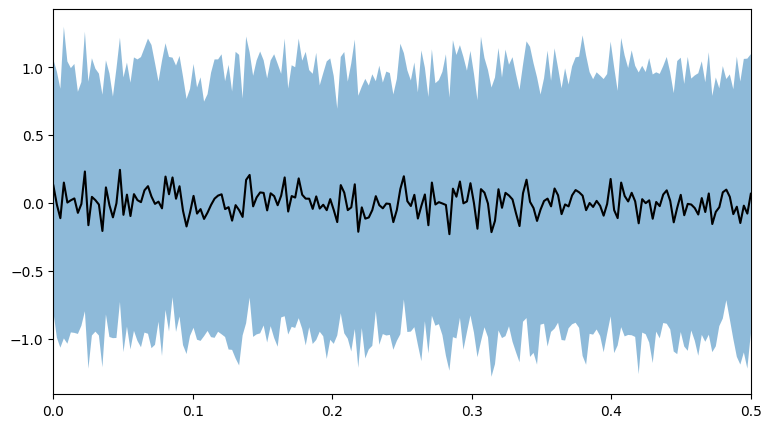

In [3]:
# This is an example of plot (random data). You can change it if you want.

## Change the following lines
periodograms = np.random.randn(100, 200)  # shape (n_trials, n_freqs)
freqs = np.linspace(0, 0.5, 200)
##


fig, ax = fig_ax(figsize=(9, 5))

avg = periodograms.mean(axis=0)
std = periodograms.std(axis=0)
ax.plot(freqs, avg, 'k-')
ax.fill_between(freqs, avg-std, avg+std, alpha=0.5)


## Question 9

# Dynamic time warping (DTW)

## Data

This data set consists of signals collected with inertial measurement units (accelerometer+gyroscope), from 230 subjects undergoing a fixed protocol:
- standing still,
- walking 10 m,
- turning around,
- walking back,
- stopping.

In this assignment, we only consider the vertical acceleration of the left foot and all signals are truncated to 20 seconds (as a result, they all have same length). Signals are sampled at 100 Hz.

The measured population is composed of healthy subjects as well as patients with neurological or orthopedic disorders.

The start and end time stamps of thousands of footsteps are available.

The data are part of a larger data set described in [1].

[1] Truong, C., Barrois-Müller, R., Moreau, T., Provost, C., Vienne-Jumeau, A., Moreau, A., Vidal, P.-P., Vayatis, N., Buffat, S., Yelnik, A., Ricard, D., & Oudre, L. (2019). A data set for the study of human locomotion with inertial measurements units. Image Processing On Line (IPOL), 9.

**The task** is to classify footsteps in healthy/non-healthy.

The following cell defines the training set `(X_train, y_train)` and testing set `(X_test, y_test)`.

In [4]:
subset_indexes_train = [95, 619, 441, 149, 951, 803, 214, 34, 37, 630]
subset_indexes_test = [683, 259, 59, 387, 634]

code_list = get_code_list()

X_train = list()  # list of footstep signals
y_train = list()  # list of pathologies (the "labels")

for code in np.take(code_list, subset_indexes_train):
    single_trial = load_human_locomotion_dataset(code)
    signal = single_trial.signal.LAZ.to_numpy()  # keeping only one dimension (from the left sensor)
    steps = single_trial.left_steps
    pathology = single_trial.metadata["PathologyGroup"]
    label = 0 if pathology=="Healthy" else 1  # 0: healthy, 1: non-healthy
    for (start, end) in steps:
        X_train.append(signal[start:end])
        y_train.append(label)

        
X_test = list()  # list of footstep signals
y_test = list()  # list of pathologies (the "labels")

for code in np.take(code_list, subset_indexes_test):
    single_trial = load_human_locomotion_dataset(code)
    signal = single_trial.signal.LAZ.to_numpy()  # keeping only one dimension (from the left sensor)
    steps = single_trial.left_steps
    pathology = single_trial.metadata["PathologyGroup"]
    label = 0 if pathology=="Healthy" else 1  # 0: healthy, 1: non-healthy
    for (start, end) in steps:
        X_test.append(signal[start:end])
        y_test.append(label)

100%|██████████| 202M/202M [13:31<00:00, 248kiB/s]  


## Question 10

In [24]:
# from array to pd
df = pd.DataFrame(X_train)
pd.set_option("display.max_rows", None)  # we show all rows after transpose
df.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
0,181.0,0.101991,0.095690,-0.123082,0.039418,0.082300,0.156270,0.403895
1,181.0,0.126305,0.111908,-0.097382,0.039508,0.098900,0.206595,0.407842
2,181.0,0.153699,0.130343,-0.090817,0.060100,0.124375,0.252295,0.586608
3,181.0,0.176084,0.136410,-0.103973,0.096118,0.151918,0.266844,0.567729
4,181.0,0.197679,0.144577,-0.119641,0.102288,0.184388,0.289711,0.567395
5,181.0,0.210354,0.158451,-0.450971,0.127718,0.201382,0.306128,0.656395
6,181.0,0.231721,0.172295,-0.530931,0.136900,0.233153,0.319132,0.707195
7,181.0,0.258340,0.185336,-0.720222,0.162952,0.261189,0.349048,0.735995
8,181.0,0.272652,0.200503,-0.888530,0.177218,0.268035,0.380610,0.772095
9,181.0,0.296849,0.216244,-0.992236,0.192718,0.303000,0.427966,0.882968


In [17]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,89,90,91,92,93,94,95,96,97,98
0,0.051210,0.090633,0.130217,0.140338,0.248104,0.273404,0.236302,0.271279,0.366244,0.507217,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.197388,0.270442,0.256287,0.220009,0.215061,0.201382,0.167731,0.181728,0.128270,0.306058,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.156270,0.221408,0.277207,0.311448,0.343348,0.374242,0.354174,0.334452,0.318383,0.408030,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.214771,0.252955,0.288899,0.309288,0.308289,0.317417,0.313458,0.277600,0.367671,0.427966,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.175760,0.203657,0.229649,0.245327,0.261188,0.268400,0.259017,0.249730,0.268035,0.410724,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Figure size 1500x500 with 0 Axes>

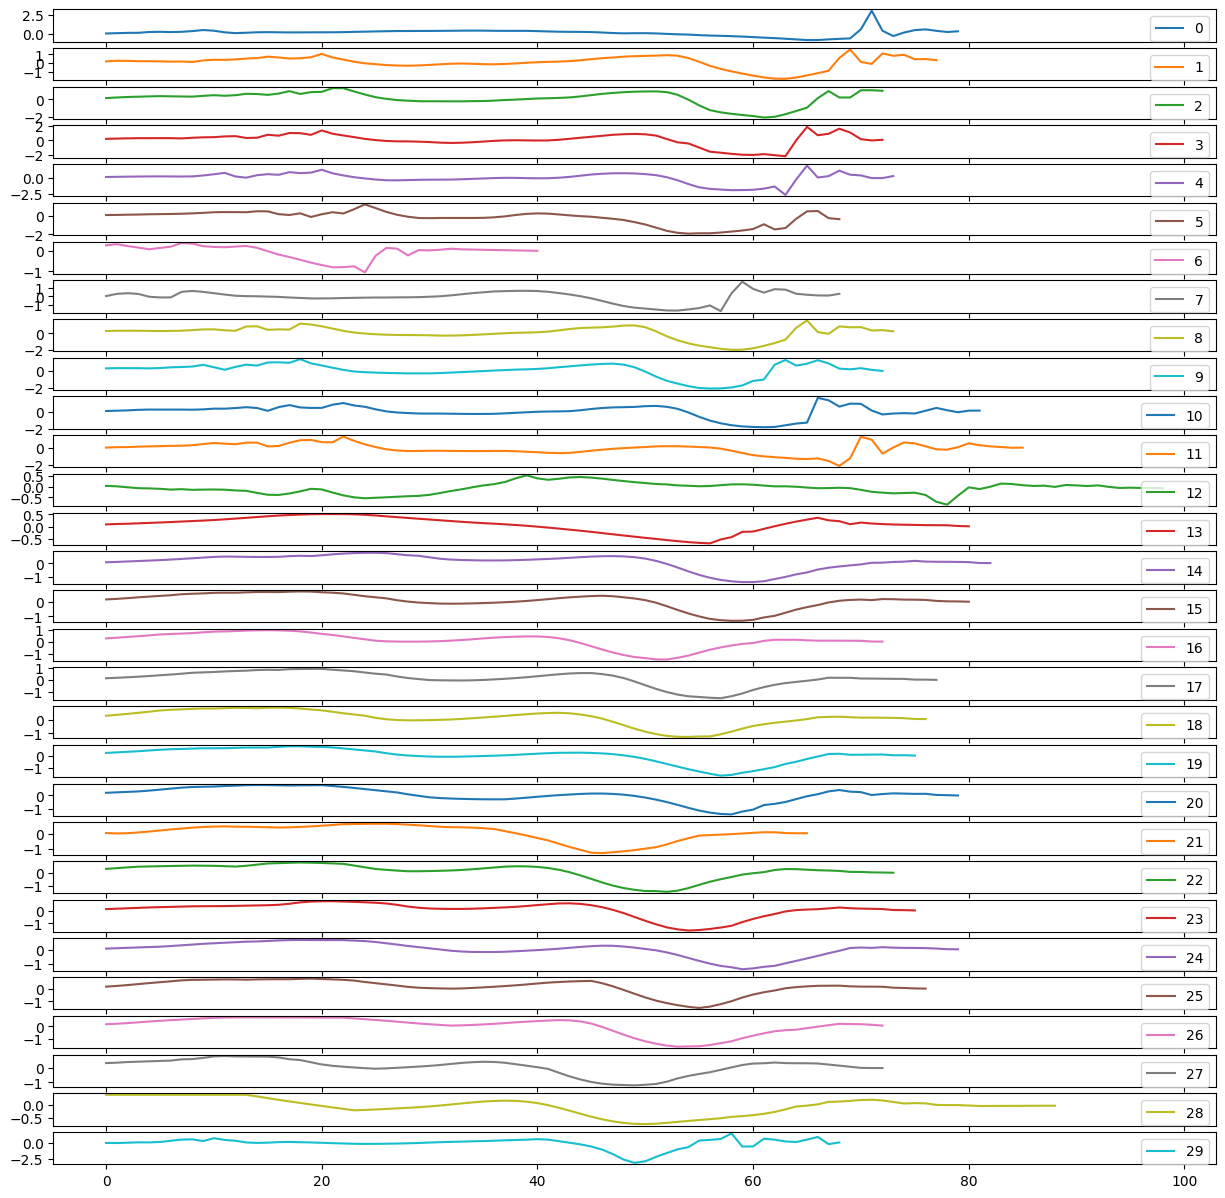

In [39]:
# plotting first 10 signals
plt.figure(figsize=(15, 5))
df.head(30).T.plot(subplots=True,figsize=(15, 15))
plt.show()


In [33]:
df_y

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [23]:
# shape of X_train
df_y = pd.DataFrame(y_train)
df_y.describe()

df_y.mean()


0    0.441989
dtype: float64

## Question 11

In [41]:
# saving data to csv
df.to_csv("data.csv", index=True)